### Regression Analysis on Wine Quality

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load Data - We will start with loading the data into a variable, which we will use for further analysis

def load_data(path):
    df=pd.read_table(path,sep=';')
    return df

In [3]:
def intial_analysis(dataframe):
       
    print('\033[1m' + "\nDisplay the shape (columns and rows) of the dataset:" +'\033[0m' )
    print("\tRows : {}\n\tColumns : {}".format(dataframe.shape[0],dataframe.shape[1]))
    
    print('\033[1m' + "\nInformation about the dataset:" +'\033[0m')
    dataframe.info()
    
    print('\033[1m' + "\nDetails on Numerical and Categorical features within dataset:\n" + '\033[0m')
    #list the number of Numerical Features in our dataset.
    numerical_feature_columns = list(df._get_numeric_data().columns)
    print("Numeric Columns:",numerical_feature_columns)
    
    #let's find out the number of Categorical Features in our dataset.
    categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
    print("Categorical Columns:",categorical_feature_columns)
    

    print('\033[1m' + "\nPrint any null values within dataset:\n" + '\033[0m')
                
    labels = []
    values = []
    for col in dataframe.columns:
        labels.append(col)
        values.append(dataframe[col].isnull().sum())
        if values[-1]!=0:
            print(col, values[-1])

In [4]:
path = r"C:\Users\divyakamat\python_git_repositories\linear_regression\Wine Quality Prediction\dataset\winequality-red.csv"
df = load_data(path)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
intial_analysis(df)


Display the shape (columns and rows) of the dataset:
	Rows : 1599
	Columns : 12

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Details on Numerical and Categorical features within dataset:

Numeric Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
def density_plots(df):
    num_cols = list(df._get_numeric_data().columns)
    for i in range(0,len(num_cols),2):
        if len(num_cols) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(df[num_cols[i]], hist=True, kde=True)
            plt.subplot(122)            
            sns.distplot(df[num_cols[i+1]], hist=True, kde=True)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(df[num_cols[i]], hist=True, kde=True)

In [9]:
def box_plot(df):
    num_cols = list(df._get_numeric_data().columns)
    for i in range(0,len(num_cols),2):
        if len(num_cols) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(x=df[num_cols[i]],orient='v')
            plt.subplot(122)            
            sns.boxplot(x=df[num_cols[i+1]],orient='v')
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(x=df[num_cols[i]],orient='v')

In [10]:
def correlation_matrix(df):
    X = df.iloc[:,:-1]  #independent columns
    y = df.iloc[:,-1]    #target column i.e price range
    #get correlations of each features in dataset
    corrmat = df.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(10,6))
    #plot heat map
    g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
from sklearn.model_selection import train_test_split

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
# Split X and y into training and test set in 80:20 ratio

def split_dataset(df):
    X=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.30)
    return X_train,X_test,y_train,y_test

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


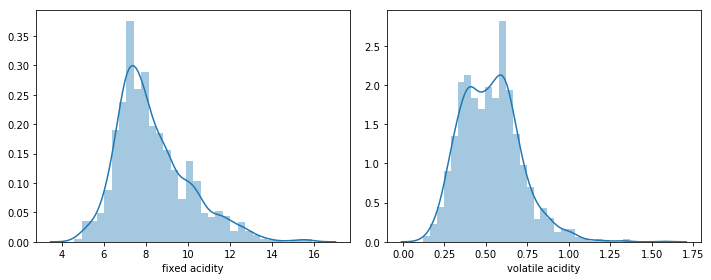

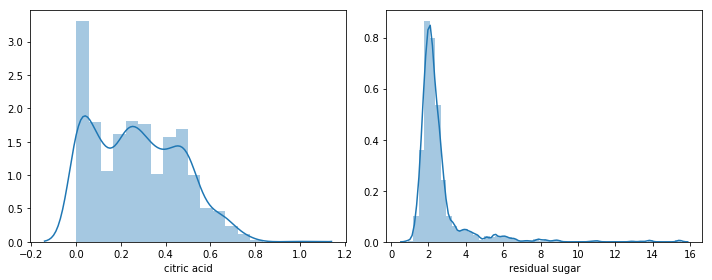

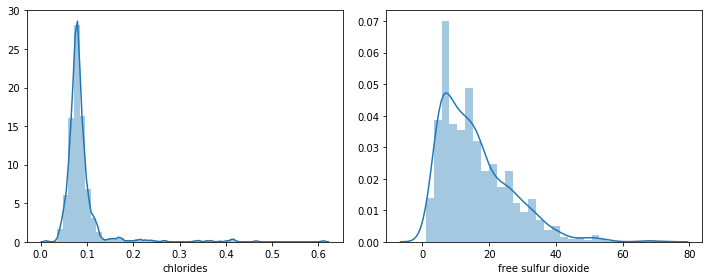

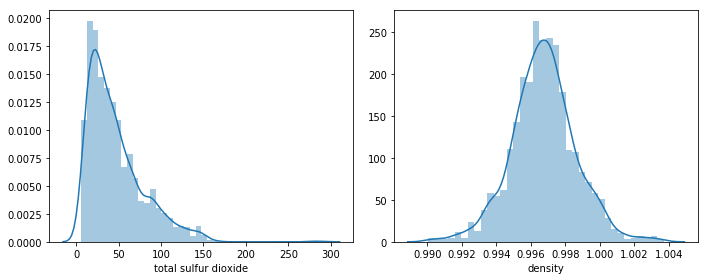

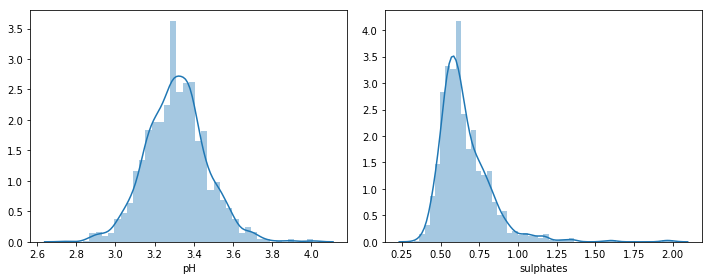

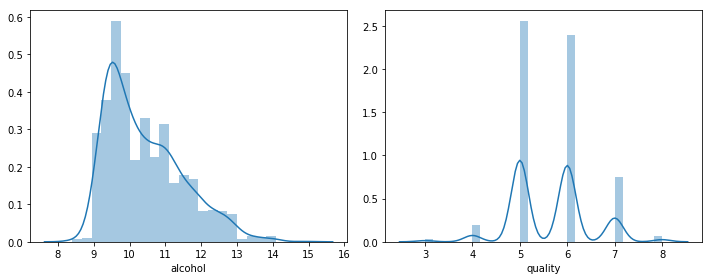

In [12]:
density_plots(df)

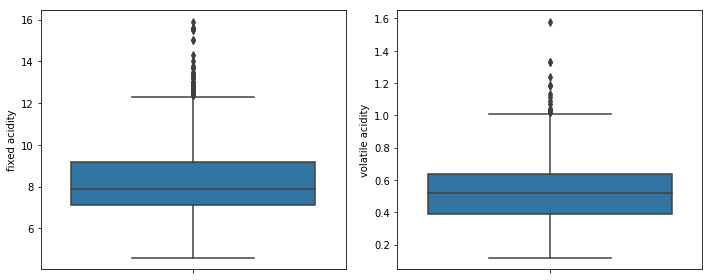

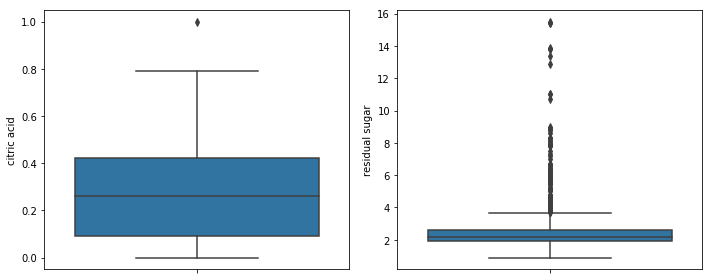

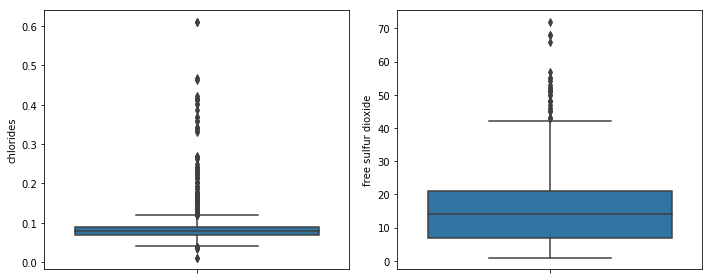

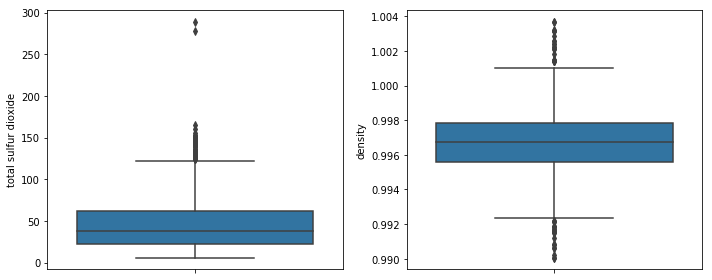

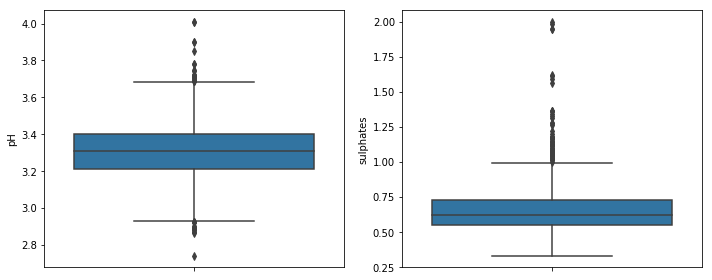

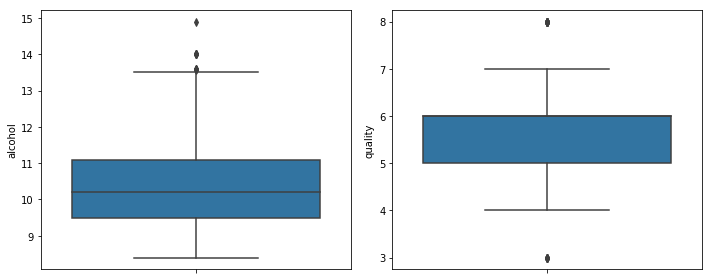

In [13]:
box_plot(df)

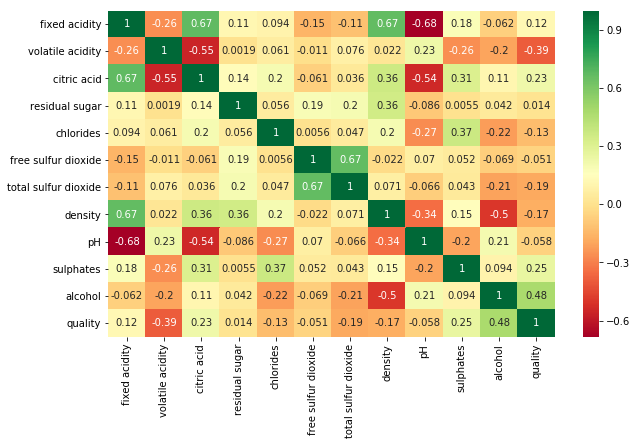

In [14]:
correlation_matrix(df)

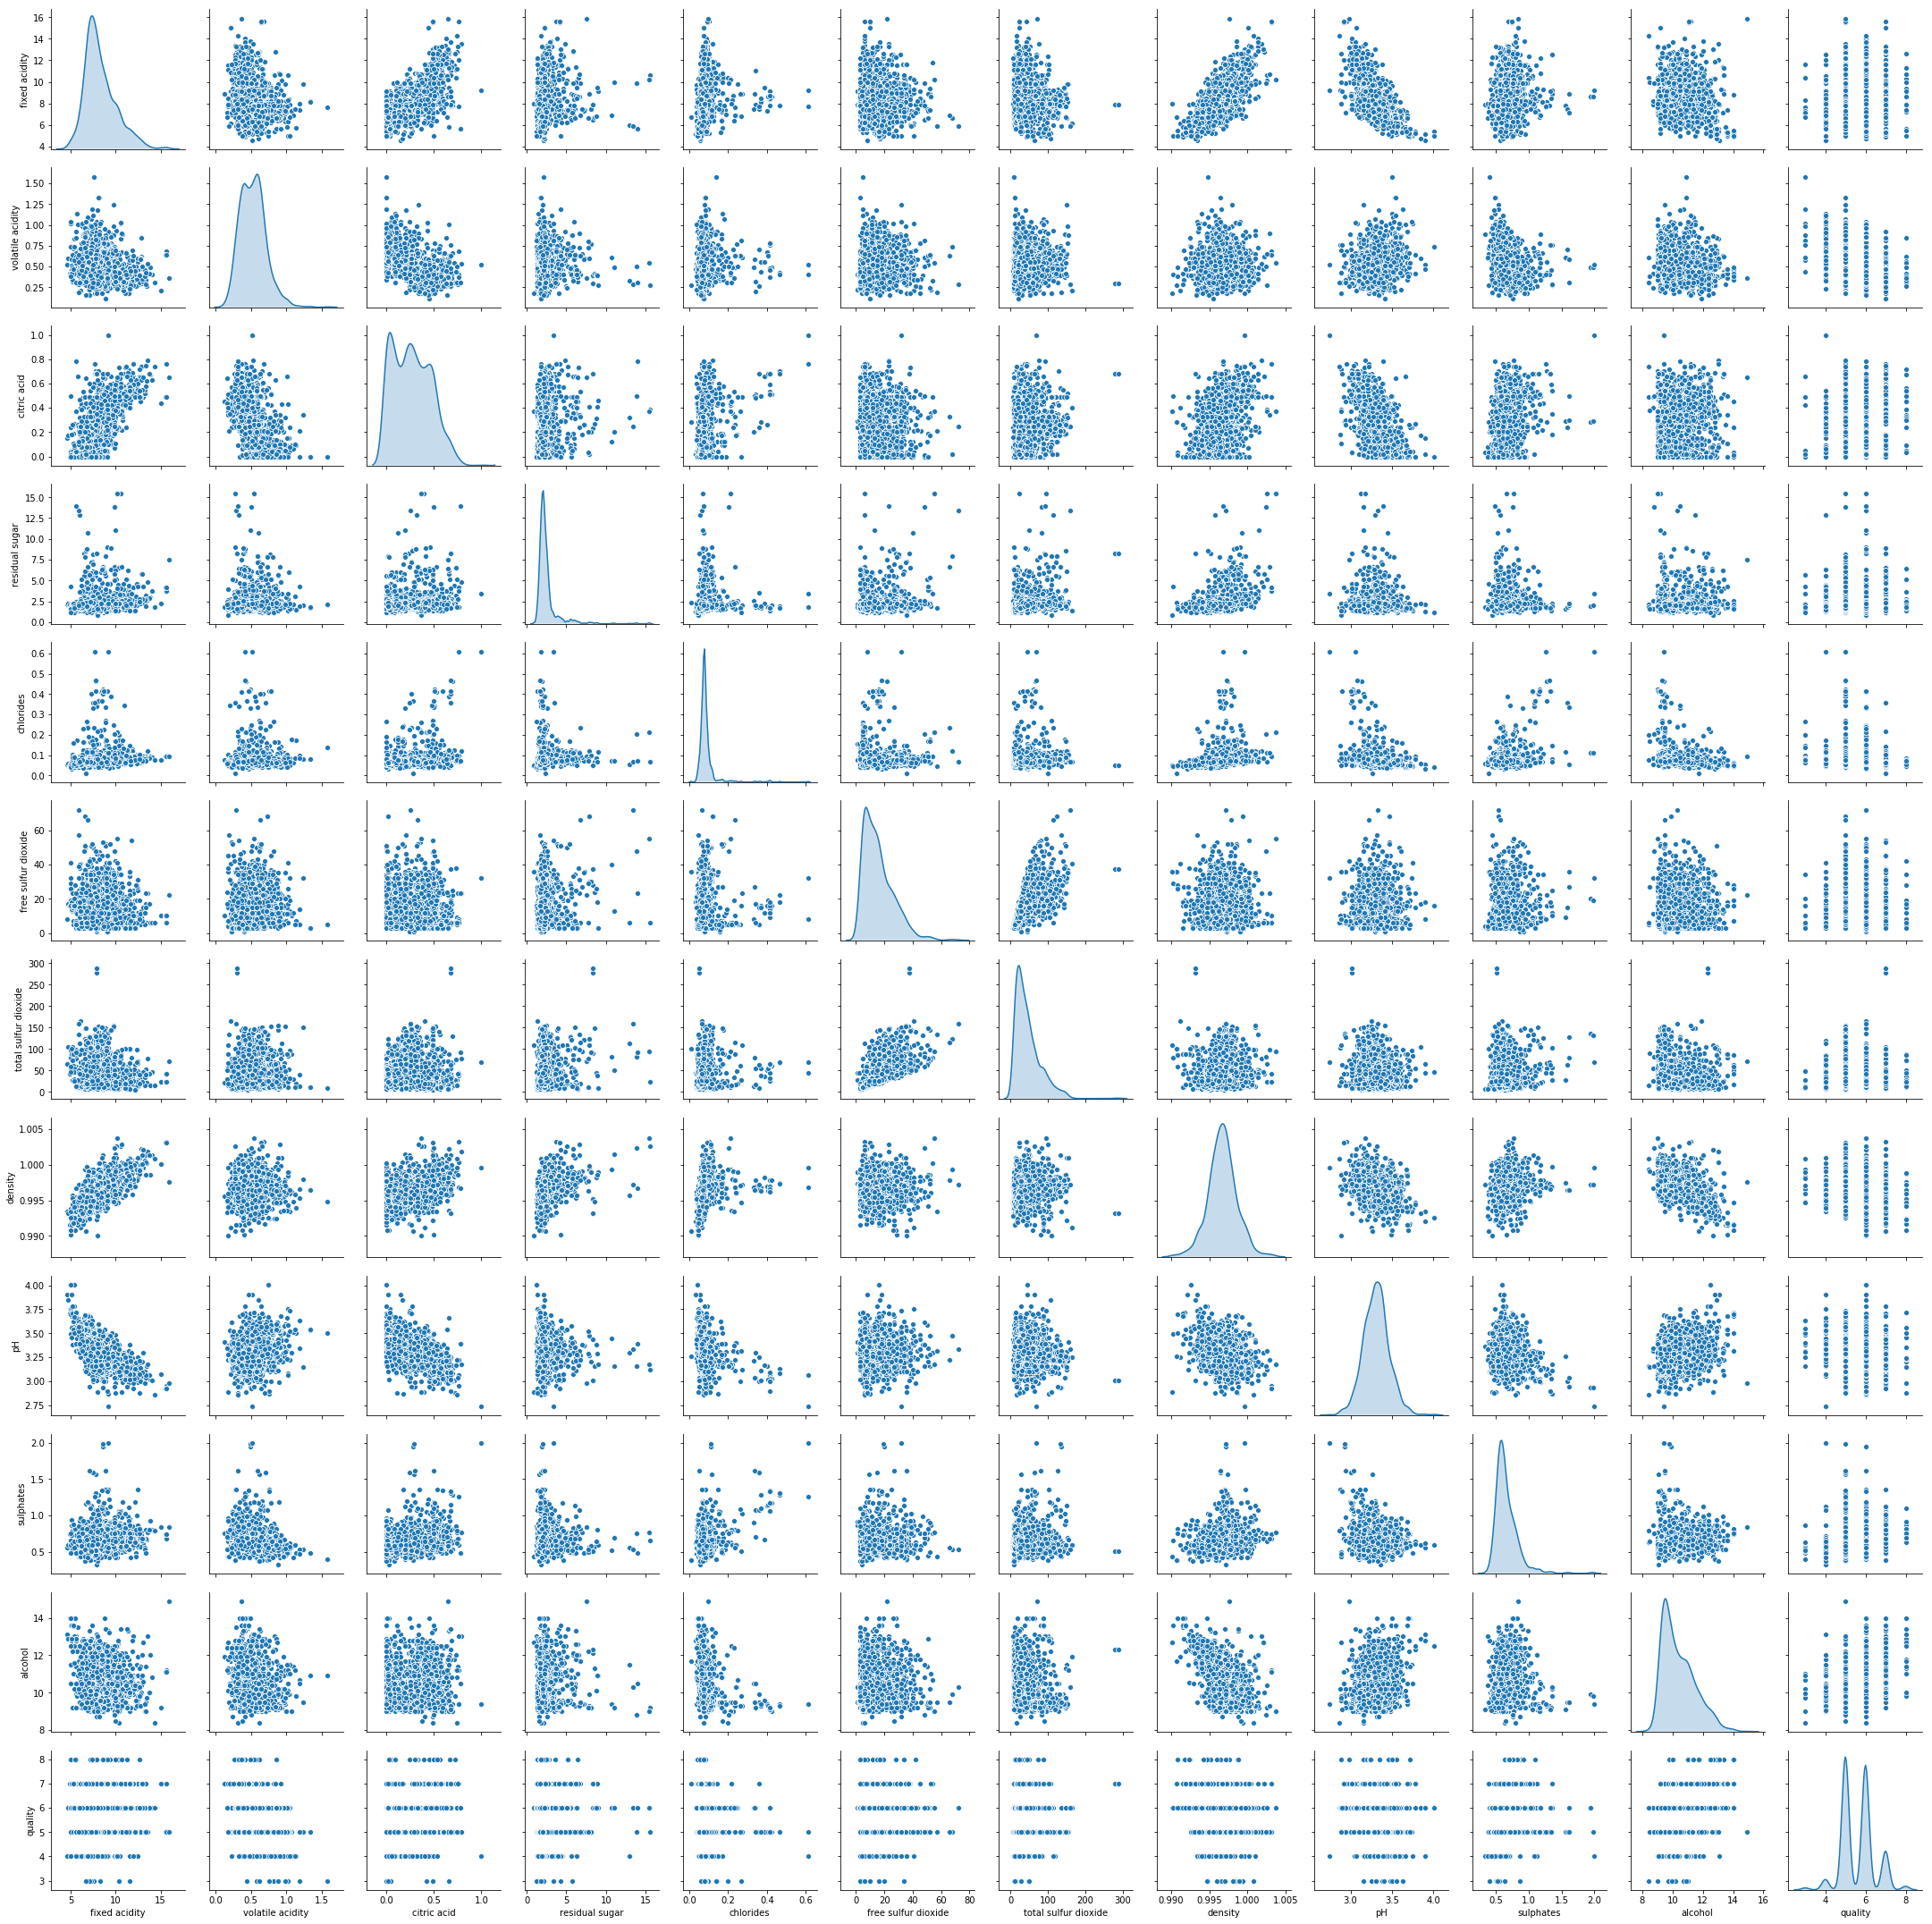

In [15]:
df = df.iloc[:,0:12]
sns.pairplot(df,diag_kind='kde')

## Outlier Detection and Removal

There are various Approaches to remove outliers - 
- Univariate Methods
- Multivariate Methods
    - Use clustering methods to identify the natural clusters in the data, identify the points which are far away from the cluster centroids
    - Use dimensionality reduction techniques
- Algorithmic Methods
    - Ensemble methods like random forests and gradient boosting provide relatively robust results for data with outliers.

#### Approach 1: Univariate Methods

- Visualize the data using scatterplots, histograms and box and whisker plots and look for extreme values.
- Assume a distribution (Gaussian) and look for values 1.5 times from the first or third quartile
- Filter out outliers candidate from training dataset and assess the model’s performance.

In [16]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [17]:
df_out = remove_outlier(df,'chlorides')
#df_out = remove_outlier(df_out,'density')
df_out = remove_outlier(df_out,'volatile acidity')
df_out = remove_outlier(df_out,'free sulfur dioxide')
df_out = remove_outlier(df_out,'residual sugar')
df_out = remove_outlier(df_out,'sulphates')

## Data Transformation

In [18]:
y = df_out.quality
X = df_out.drop('quality', axis=1)

#X= np.sqrt(X)
X=np.log(X+1)

In [19]:
X.shape

(1271, 11)

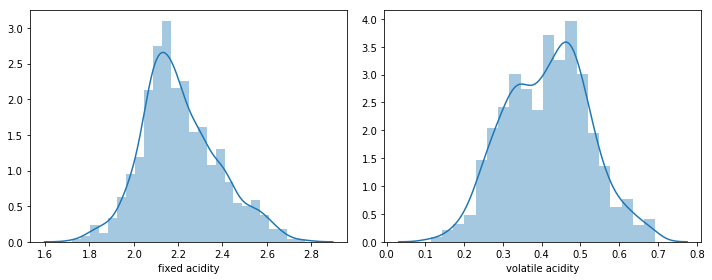

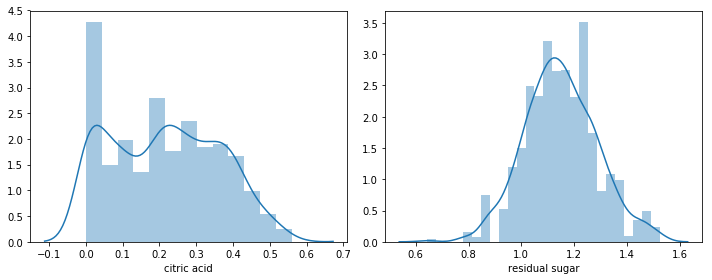

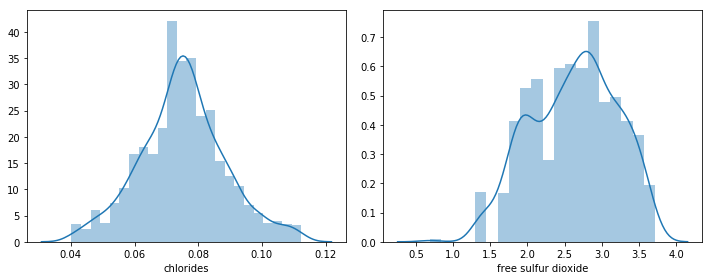

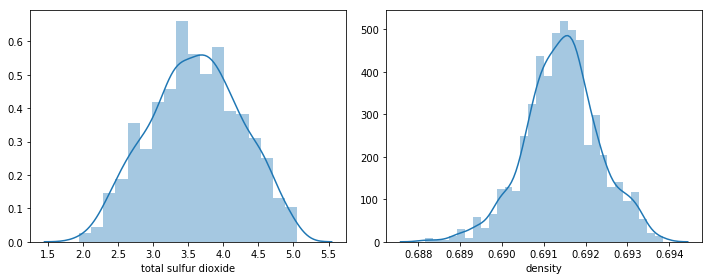

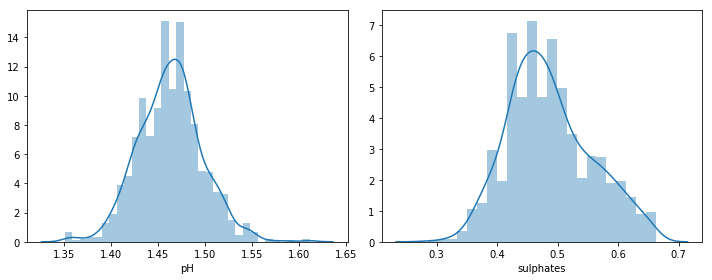

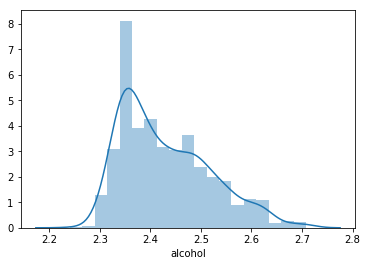

In [20]:
density_plots(X)

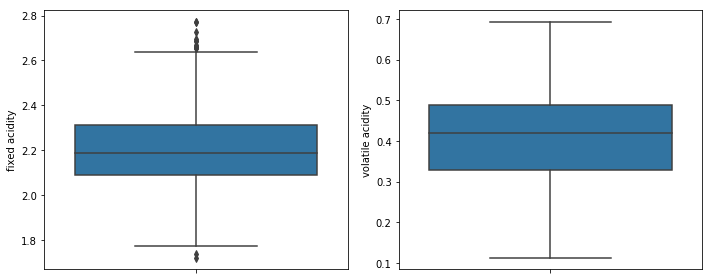

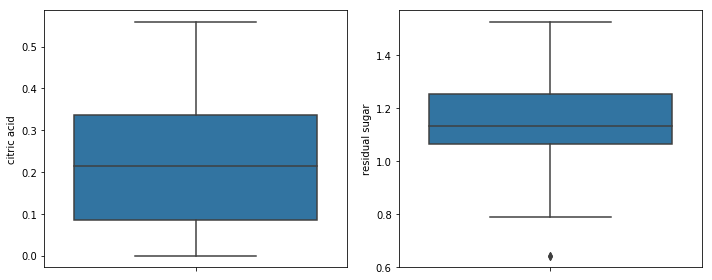

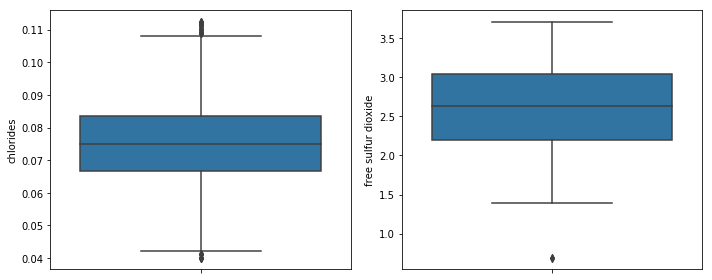

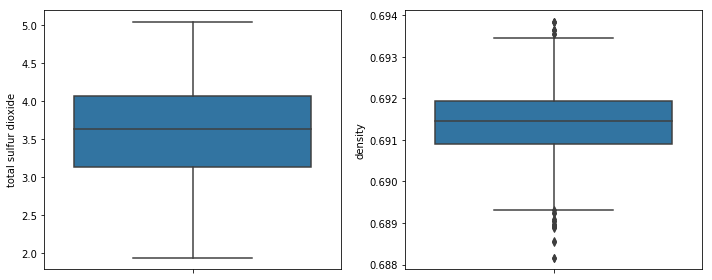

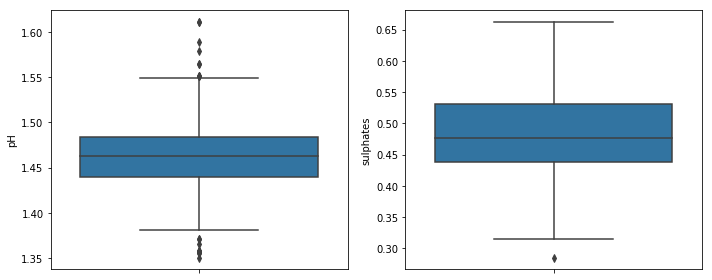

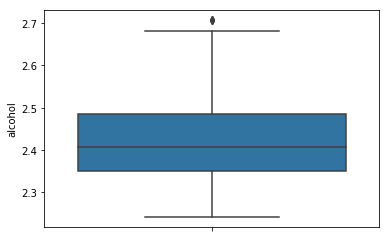

In [21]:
box_plot(X)

## Standardization

In [22]:
# Standardizing numerical features
from sklearn.preprocessing import StandardScaler

def standardize(df,columns):
    stand_scale= StandardScaler()
    column_transform = columns
    df.loc[:, column_transform] = stand_scale.fit_transform(df.loc[:, column_transform])
    return df
    
df_stand = standardize(X,X.columns)
df_stand.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.461945,1.083233,-1.464586,-0.614769,-0.145996,-0.234935,-0.074718,0.692509,1.261464,-0.606828,-0.990051
1,-0.192491,2.019302,-1.464586,0.956674,1.360431,1.108983,0.949467,0.128095,-0.817829,0.468242,-0.564651
2,-0.192491,1.405838,-1.198278,0.324302,0.952602,0.265099,0.622278,0.241000,-0.403661,0.206851,-0.564651
3,1.699732,-1.556050,1.554827,-0.614769,-0.215200,0.469823,0.781946,0.805357,-1.097241,-0.422025,-0.564651
4,-0.461945,1.083233,-1.464586,-0.614769,-0.145996,-0.234935,-0.074718,0.692509,1.261464,-0.606828,-0.990051


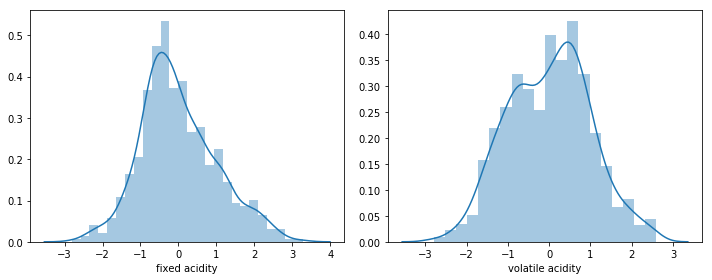

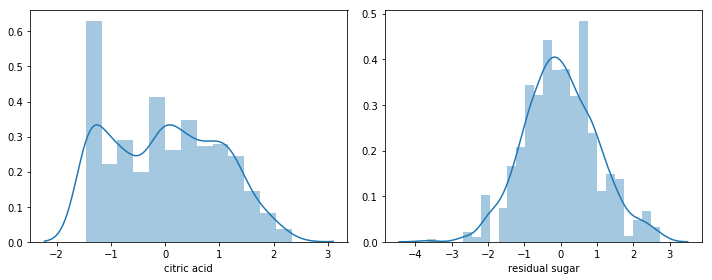

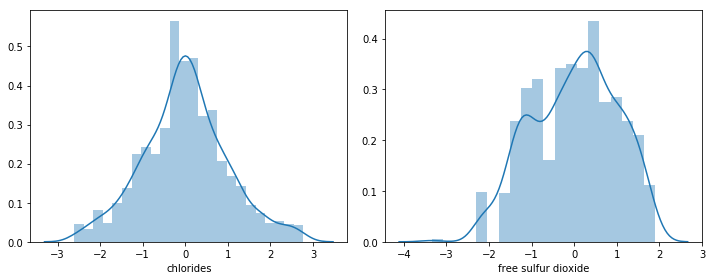

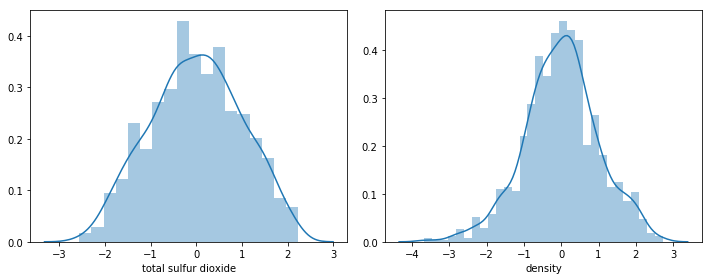

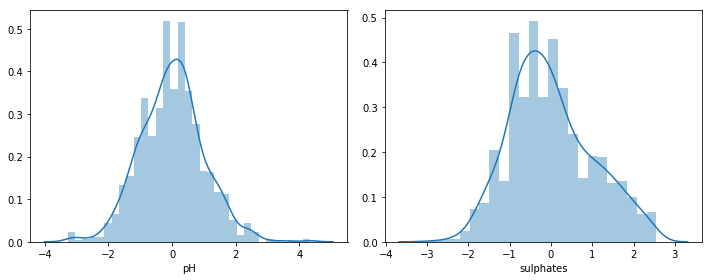

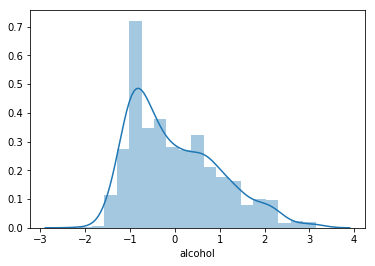

In [23]:
density_plots(df_stand)

## Split the data and pass it to the model

In [24]:
df_final = pd.concat([df_stand,y],axis=1)
X_train, X_test, y_train, y_test =  split_dataset(df_final)

In [25]:
df_final.shape

(1271, 12)

## Pass the data to the Model Algorithms

In [26]:
def plot_residuals(y_test,y_pred,name="Residual Plot"):
    residuals = y_test - y_pred
    plt.scatter(y_test,residuals)
    plt.hlines(y=0, xmin=0, xmax=10)
    plt.title(name)
    plt.ylabel('Residual')
    plt.xlabel('Fitted')

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def cross_validation_regressor(model,x_train,y_train):
    kf = KFold(n_splits=10, random_state=7)
    score = cross_val_score(model,x_train,y_train,cv=kf)
    return score.mean()

In [28]:
from sklearn.linear_model import LinearRegression
def linear_regression(X_train,y_train):
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    return regressor

In [29]:
from sklearn.linear_model import Lasso
def lasso(x_train,x_test,y_train,y_test,alpha):
    lass = Lasso(alpha=alpha,random_state=7,normalize=True)
    model = lass.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2=model.score(x_test,y_test)
    rmse = np.sqrt(mse)
    val = cross_validation_regressor(lass,x_train,y_train)
    adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)- x_test.shape[1]- 1)
    stats = pd.DataFrame({'cross_validation':val,
                         'rmse':rmse,'mse':mse,'mae':mae,'r2':(model.score(x_test,y_test)),'adj_r_squared':adj_r_squared},index=['name'])
    return model,y_pred,stats

In [30]:
from sklearn.linear_model import Ridge

def ridge(x_train,x_test,y_train,y_test,alpha):
    rid = Ridge(alpha=alpha,random_state=7,normalize=True)
    model = rid.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2=model.score(x_test,y_test)
    rmse = np.sqrt(mse)
    val = cross_validation_regressor(rid,x_train,y_train)
    adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)- x_test.shape[1]- 1)
    stats = pd.DataFrame({'cross_validation':val,
                         'rmse':rmse,'mse':mse,'mae':mae,'r2':model.score(x_test,y_test),'adj_r_squared':adj_r_squared},index=['name'])
    return model,y_pred,stats

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_predictor(model,x_test,y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mse)
    adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)- x_test.shape[1]- 1)
    stats = pd.DataFrame({'cross_validation':val,'rmse':rmse,'mse':mse,'mae':mae,'r2':r2,'adj_r_squared':adj_r_squared},index=['name'])
    return model,y_pred,stats

## Linear Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
      adj_r_squared  cross_validation       mae       mse        r2      rmse
name        0.41787          0.362059  0.475678  0.374087  0.434676  0.611626


,0,Coefficient Estimate
0,fixed acidity,0.015296
1,volatile acidity,-0.146225
2,citric acid,-0.072941
3,residual sugar,0.018064
4,chlorides,-0.030855
5,free sulfur dioxide,0.053936
6,total sulfur dioxide,-0.068682
7,density,-0.023364
8,pH,-0.086138
9,sulphates,0.217558


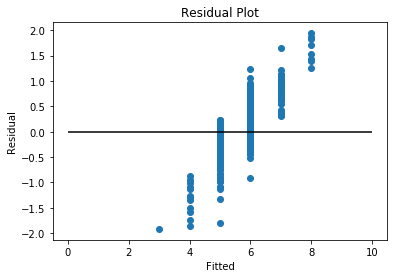

In [32]:
model = linear_regression(X_train,y_train)
val = cross_validation_regressor(model,X_train,y_train)
model,y_pred,stats = regression_predictor(model, X_test, y_test)
print(model)
print(stats)
plot_residuals(y_test,y_pred)

## calculating coefficients

coeff = pd.DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = pd.Series(model.coef_)
coeff

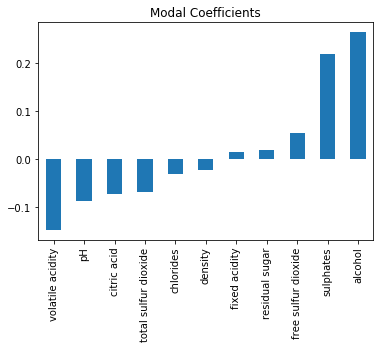

In [33]:
predictors = X_train.columns
coef = pd.Series(model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## Linear Regression - with L1 Regularization (Lasso)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=7,
   selection='cyclic', tol=0.0001, warm_start=False)
      adj_r_squared  cross_validation       mae      mse        r2      rmse
name       0.417569          0.362193  0.475799  0.37428  0.434385  0.611784


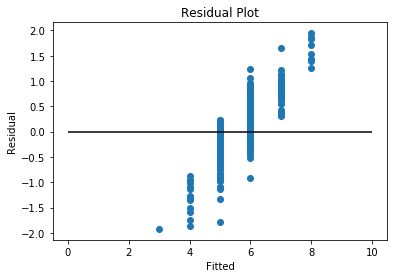

In [34]:
l_model,l_y_pred,l_stats = lasso(X_train,X_test,y_train,y_test,alpha=0.00001)
print(l_model)
print(l_stats)
plot_residuals(y_test,l_y_pred)

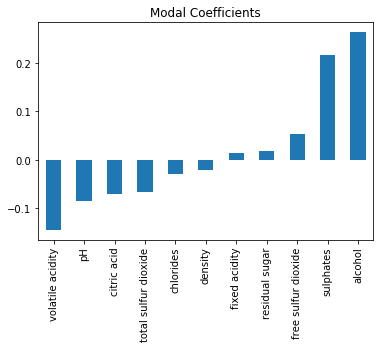

In [35]:
predictors = X_train.columns
coef = pd.Series(l_model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## Linear Regression - with L2 Regularization (Ridge)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=7, solver='auto', tol=0.001)
      adj_r_squared  cross_validation       mae      mse        r2      rmse
name        0.41788           0.36211  0.475702  0.37408  0.434686  0.611621


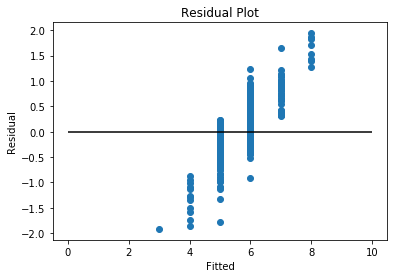

In [36]:
r_model,r_y_pred,r_stats = ridge(X_train,X_test,y_train,y_test,alpha=0.001)
print(r_model)
print(r_stats)
plot_residuals(y_test,r_y_pred)

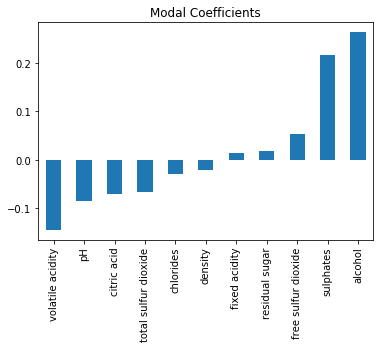

In [37]:
predictors = X_train.columns
coef = pd.Series(l_model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
cl = LogisticRegression()
cl.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
#Making confusion matrix
cm = confusion_matrix(y_test,cl.predict(X_test))
print(cm)

[[  0   0   1   0   0   0]
 [  0   0   9   3   0   0]
 [  0   0 128  33   0   0]
 [  0   0  50 101   4   0]
 [  0   0   1  41   3   0]
 [  0   0   0   5   3   0]]


In [40]:
y_predict=cl.predict(X_test)

In [41]:
accuracy_score(y_test,y_predict)

0.6073298429319371

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectFromModel

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [43]:
print('Before');
print(X.shape)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

print('\nFeature Importance');
print(X_train.columns)
print(clf.feature_importances_)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)

print('\nAfter'); 
print(X_new.shape)

y_predict=clf.predict(X_test)
accuracy_score(y_test,y_predict)

Before
(1271, 11)

Feature Importance
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
[0.06565714 0.11926174 0.06814224 0.0585399  0.09323815 0.06451942
 0.06942389 0.09074214 0.05284914 0.12767017 0.18995608]

After
(889, 4)


0.6387434554973822

In [44]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=50,
                              random_state=0)

forest.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
importances = forest.feature_importances_
importances

array([0.07294169, 0.0915203 , 0.07562336, 0.07042163, 0.08495995,
       0.07522584, 0.09656813, 0.08779638, 0.07533664, 0.12752295,
       0.14208312])

In [46]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
std

array([0.01518375, 0.01493716, 0.01497256, 0.01362832, 0.01324079,
       0.01297041, 0.01957954, 0.01772633, 0.01336227, 0.01898605,
       0.02668074])

In [47]:
indices = np.argsort(importances)[::-1]
indices

array([10,  9,  6,  1,  7,  4,  2,  8,  5,  0,  3], dtype=int64)

In [48]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (feature %d) : \t (%f)" % (f + 1, X_train.columns[f],indices[f],importances[indices[f]]))
    

Feature ranking:
1. fixed acidity (feature 10) : 	 (0.142083)
2. volatile acidity (feature 9) : 	 (0.127523)
3. citric acid (feature 6) : 	 (0.096568)
4. residual sugar (feature 1) : 	 (0.091520)
5. chlorides (feature 7) : 	 (0.087796)
6. free sulfur dioxide (feature 4) : 	 (0.084960)
7. total sulfur dioxide (feature 2) : 	 (0.075623)
8. density (feature 8) : 	 (0.075337)
9. pH (feature 5) : 	 (0.075226)
10. sulphates (feature 0) : 	 (0.072942)
11. alcohol (feature 3) : 	 (0.070422)


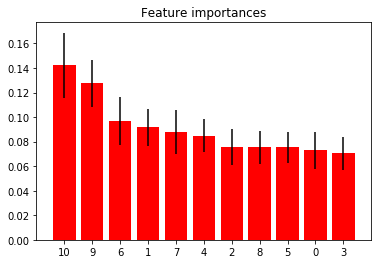

In [49]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()